## __🇸🇴 Somalia Labour Force Survey (LFS) 2019__
### __Exploratory Data Analysis and Key Insights__

------

## __1. Introduction__

The Somalia Labour Force Survey (LFS) 2019, conducted by the National Bureau of Statistics (NBS), provides comprehensive information on the employment, unemployment, and economic activity of individuals across Somalia.
This project aims to explore the dataset to better understand labour market patterns — particularly by __gender__ and __education level__ — using statistical and visual analysis.

### __Research Objectives__

- Describe the composition of the working-age population in Somalia.

- Examine how __gender__ influences labour force participation.
- Explore the relationship between __education level__ and __employment status__.
- Identify potential associations between __educational attainment__ and __labour market outcomes__ such as hours worked and employment type.

---

## __2. Data and Methodology__
### __2.1 Data Source__

Data used in this analysis were obtained from the __Somalia National Data Archive (NADA)__, under the dataset titled Somali Labour Force Survey 2019 (SOMLFS2019).

### __2.2 Variables of Interest__

Key variables extracted from the data include:
- __Gender__ - `(ilo_sex)`

- __Education level__ - `(ilo_edu_aggregate)`
- __Labour force status__ - `(ilo_lfs)`
- __Employment status__ - `(ilo_job1_ste_aggregate)`
- __Sample weight__ - `(ilo_wgt)`

Weighted counts are used throughout this analysis to account for the survey’s complex design.

### __2.3 Methodological Approach__

The analysis combines:
- __Descriptive statistics__ for demographic and labour force breakdowns

- __Cross-tabulations__ by gender, education, and employment status
- __Weighted aggregation__ using `sample_weight`
- __Visualization__ using `matplotlib` and `seaborn`

In [2]:
import pandas as pd
import numpy as np
import pyreadstat
import matplotlib.pyplot as plt
import seaborn as sns


## __3. Data Preparation and Cleaning__
- Loaded `.sav` files using `pyreadstat`.

- Renamed columns using variable labels for clarity.
- Replaced coded responses with categorical labels (e.g., `1 - Male` → `Male`).
- Filtered the dataset to include working-age population (15–64 years).
- Converted education and employment variables into ordered categorical types to maintain logical sorting in plots.

In [3]:
file_path = "/Users/kainanhasaan/Downloads/SOMLFS2019IND.sav"
df, metadata = pyreadstat.read_sav(file_path, metadataonly=True)

selected_columns = [
    # Identification and weights
    'ID', 'ilo_wgt', 'ilo_geo',
    # Demographics
    'ilo_sex', 'ilo_age', 'ilo_edu_aggregate',
    # Employment and hours
    'ilo_lfs_emp', 'ilo_lfs', 'ilo_job1_how_usual', 'ilo_job1_how_actual', 
    # Unemployment 
    'ilo_lfs_notemp_activ', 'ilo_lfs_notemp_will', 'ilo_dis',    
    # Informality and job characteristics
    'ilo_job1_ste_aggregate', 'ilo_job1_ste_icse93', 'ilo_cat_une',
    # Education–occupation mismatch
    'ilo_job1_ocu_skill', 'ilo_job1_ocu_aggregate',
    # Post education transition
    'ilo_swt_stage','ilo_swt_form'
]
lfs19 = pd.read_spss(file_path, usecols= selected_columns)

__Currently the dataframe provided uses column names in an unreadable format.__

- `ilo_edu_aggregrate` = `Education (Aggregrate Level)`

- `ilo_mrts_aggregrate` = `Martial status (Aggregrate Level)`

- `ilo_lfs_emp` = `Employment status`

The metadata provides column labels for each column which is in a human-readable format which I will be using for my columns

In [42]:
col_labels = {
    'ID': 'id',
    'ilo_wgt': 'sample_weight',
    'ilo_geo': 'area_of_residence',
    'ilo_sex': 'gender',
    'ilo_age': 'age',
    'ilo_edu_aggregate': 'education_level',
    'ilo_lfs_emp': 'employment_status',
    'ilo_lfs': 'labour_force_status',
    'ilo_lfs_notemp_activ': 'looking_to_work',
    'ilo_lfs_notemp_will': 'available_to_work',
    'ilo_dis': 'discouraged_js',
    'ilo_job1_how_usual': 'usual_hours_worked_main_job',
    'ilo_job1_how_actual': 'actual_hours_worked_main_job',
    'ilo_job1_ife_nature': 'informality_of_main_job',
    'ilo_job1_ste_icse93': 'status_in_employment',
    'ilo_job1_ocu_aggregate': 'occupation_category',
    'ilo_job1_ocu_skill': 'occupation_level',
    'ilo_job1_ste_aggregate': 'job_status',
    'ilo_cat_une': 'cat_of_unemployment',
    'ilo_swt_stage': 'transition_stage',
    'ilo_swt_form': 'transition_form',
}
lfs19.rename(columns=col_labels, inplace=True)
lfs19.sample(5)


,id,sample_weight,area_of_residence,gender,age,education_level,employment_status,looking_to_work,available_to_work,labour_force_status,status_in_employment,job_status,occupation_category,occupation_level,usual_hours_worked_main_job,actual_hours_worked_main_job,cat_of_unemployment,discouraged_js,transition_stage,transition_form
12164,12165.0,33.372391,Rural,Female,3.0,Level not stated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3379,3380.0,275.723663,Urban,Male,49.0,Intermediate,In Employment,NaN,NaN,Employed,Employees,Employees,Skilled agricultural and trades workers,Skill level 2 (medium),12.0,NaN,NaN,NaN,NaN,NaN
16790,16791.0,167.422226,Rural,Male,18.0,Level not stated,Not in employment,Not actively looking to work,Willing to work,Outside Labour Force,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Transition not yet started,Students outside the labour force
5827,5828.0,93.868355,Urban,Male,37.0,Intermediate,In Employment,NaN,NaN,Employed,Employees,Employees,Elementary occupations,Skill level 1 (low),48.0,NaN,NaN,NaN,NaN,NaN
1507,1508.0,275.723663,Urban,Male,70.0,Less than basic,Not in employment,Not actively looking to work,Not willing to work,Outside Labour Force,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


__Standardising data__

To make the dataset more uniform and effecient when completing queries I will be standardising some of the data. For example;
- `gender` column we have the data formatted as 

    - `1 - Male` or `2 - Female` instead of `Male` or `Female`

In [5]:
import re

for column in lfs19.columns:
    if lfs19[column].dtype == 'object' or lfs19[column].dtype == 'category':
        lfs19[column] = lfs19[column].str.replace(r'^[\d\W_]+', '', regex=True).str.strip()
    


__Check for and handle any duplicate rows__

In [6]:
lfs19[lfs19.duplicated()]

,id,sample_weight,area_of_residence,gender,age,education_level,employment_status,looking_to_work,available_to_work,labour_force_status,status_in_employment,job_status,occupation_category,occupation_level,usual_hours_worked_main_job,actual_hours_worked_main_job,cat_of_unemployment,discouraged_js,transition_stage,transition_form


In [40]:
lfs19.sample(3)

,id,sample_weight,area_of_residence,gender,age,education_level,employment_status,looking_to_work,available_to_work,labour_force_status,status_in_employment,job_status,occupation_category,occupation_level,usual_hours_worked_main_job,actual_hours_worked_main_job,cat_of_unemployment,discouraged_js,transition_stage,transition_form
15610,15611.0,116.122726,Urban,Female,21.0,Level not stated,Not in employment,Not actively looking to work,Not willing to work,Outside Labour Force,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Transition not yet started,Students outside the labour force
14989,14990.0,112.503403,Rural,Male,6.0,Level not stated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10131,10132.0,149.920807,Urban,Male,15.0,Level not stated,Not in employment,Not actively looking to work,Not willing to work,Outside Labour Force,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Transition not yet started,Students outside the labour force


## __4. Descriptive Overview__
### __4.1 Population Composition__
- Distribution of individuals by gender in the working-age population (>15)

- Overall labour force participation rate.

In [8]:
# Filtering the original df to the working age population (above the age of 15)
working_age = lfs19[lfs19['age'] > 15].copy()

In [9]:
gen = working_age.groupby('gender')['sample_weight'].sum().reset_index()
gen['%'] = round((gen['sample_weight'] / gen['sample_weight'].sum())*100, 2)
gen

,gender,sample_weight,%
0,Female,1.872354e+06,52.75
1,Male,1.676872e+06,47.25


In [10]:
lbf = working_age.groupby(['labour_force_status'])['sample_weight'].sum().reset_index()
lbf['%'] = round((lbf['sample_weight'] / lbf['sample_weight'].sum())*100, 2)
lbf

,labour_force_status,sample_weight,%
0,Employed,9.469146e+05,26.68
1,Outside Labour Force,2.345553e+06,66.09
2,Unemployed,2.567578e+05,7.23


## __5. Labour Force participation % by gender__

In [19]:
lbf_gender = working_age.groupby(['gender', 'labour_force_status'], observed=True)['sample_weight'].sum().reset_index()
lbf_gender['total_per_gender'] = lbf_gender.groupby('gender')['sample_weight'].transform('sum')
lbf_gender['%_per_gender'] = round(lbf_gender['sample_weight'] / lbf_gender['total_per_gender']* 100, 1)

lbf_g_pivot = lbf_gender.pivot(index='gender', columns='labour_force_status', values='%_per_gender')
lbf_g_pivot.rename_axis(index=None, columns=None, inplace=True)
lbf_g_pivot

,Employed,Outside Labour Force,Unemployed
Female,15.4,78.9,5.8
Male,39.3,51.8,8.9


### __5.1 Key Findings__

- Nearly four out of five women in Somalia are outside the labour force compared to just over half of men, indicating substantial gender disparities in participation.

### __5.2 Visualisation__

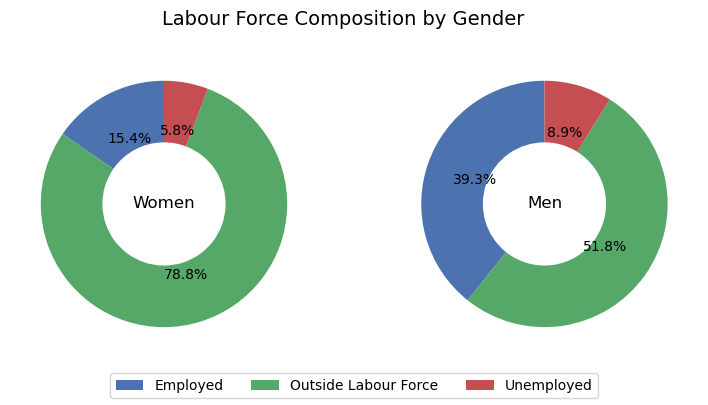

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(9, 4))
vis_colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B3']

# Female
axes[0].pie(
    lbf_g_pivot.loc['Female'],
    autopct='%1.1f%%',
    startangle=90,
    colors= vis_colors,
    wedgeprops={'width':0.5}
)
axes[0].text(0, 0, 'Women', ha='center', va='center', fontsize=12)

# Male
axes[1].pie(
    lbf_g_pivot.loc['Male'],
    autopct='%1.1f%%',
    startangle=90,
    colors=vis_colors,
    wedgeprops={'width':0.5}
)
axes[1].text(0, 0, 'Men', ha='center', va='center', fontsize=12)

fig.legend(['Employed', 'Outside Labour Force', 'Unemployed'], loc='lower center', ncol=3)


plt.suptitle('Labour Force Composition by Gender', fontsize=14)
plt.show()

**Figure 1.** Labour Force Composition by Gender (2019)

## __6. Education and Labour Force Status__

In [32]:
education_df = working_age[working_age['education_level'] != 'Level not stated'].copy()

education_order = ['Less than basic', 'Basic', 'Intermediate', 'Advanced']
education_df['education_level'] = pd.Categorical(education_df['education_level'], categories=education_order, ordered=True)

ed_lf = education_df.groupby(['education_level', 'labour_force_status'], observed=True)['sample_weight'].sum().reset_index()
ed_lf['%'] = ed_lf.groupby('education_level', observed=True)['sample_weight'].transform(lambda x: round((x/x.sum())*100, 2))

pivot = ed_lf.pivot(index='education_level', columns='labour_force_status', values='%').rename_axis(index=None, columns=None)
pivot

,Employed,Outside Labour Force,Unemployed
Less than basic,22.32,70.81,6.87
Basic,33.43,56.99,9.58
Intermediate,38.98,53.75,7.27
Advanced,50.89,37.08,12.02


### __6.1 Key Findings__
- As education level increases, the share of individuals in employment rises.

- Those with lower education are more likely to be outside the labour force.

### __6.2 Visualisation__

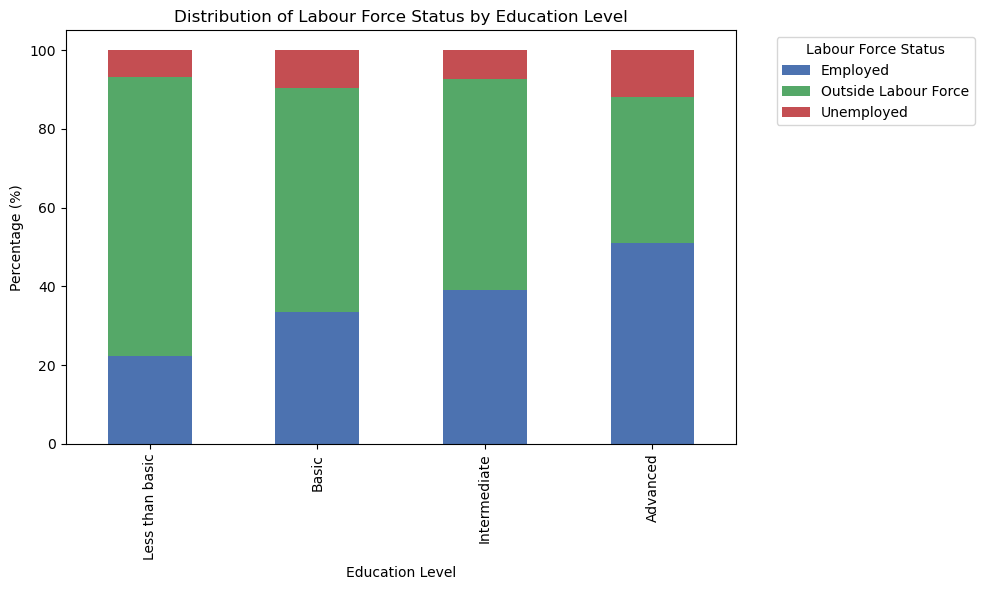

In [33]:
pivot.plot(kind='bar', stacked=True, figsize=(10,6), color=vis_colors)
plt.title('Distribution of Labour Force Status by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Percentage (%)')
plt.legend(title='Labour Force Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**Figure 2.** Labour Force Distribution by Education Level (2019)

## __7. Education participation by Gender__
### __7.1 Visualsiation__

/var/folders/g5/hr880mxj4zjd47pd9vb_n_km0000gn/T/ipykernel_37721/1416270389.py:4: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.barplot(


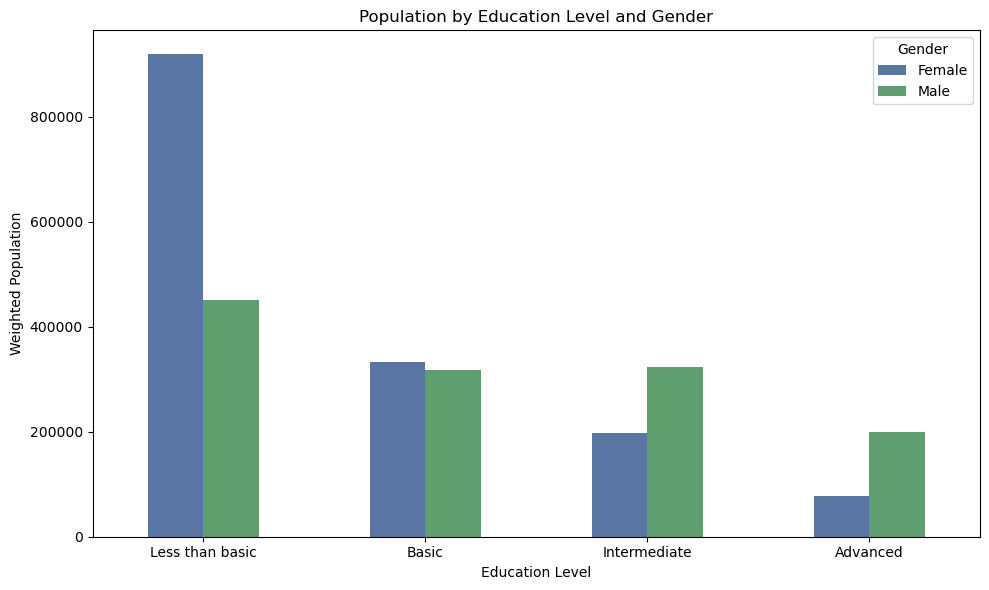

In [34]:
ed_gen = education_df.groupby(['education_level', 'gender'], observed=True)['sample_weight'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(
    data=ed_gen,
    x='education_level',
    y='sample_weight',
    hue='gender',
    width=0.5,
    palette=vis_colors
)

plt.title('Population by Education Level and Gender')
plt.xlabel('Education Level')
plt.ylabel('Weighted Population')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

**Figure 3.** Population by Education Level & Gender (2019)

### __7.2 Key Findings__
- The largest share of the population — both male and female — falls under the “Less than basic” education category.

- At the __“Less than basic”__ level, female participation is substantially higher than male participation.
- As education levels increase, female participation decreases across the whole graph
- As education levels increase to __“Intermediate”__ and __“Advanced”__, male participation surpasses female participation.

## __8. Effect of Education level on status in employment by gender__
### __8.1 Visualisation__

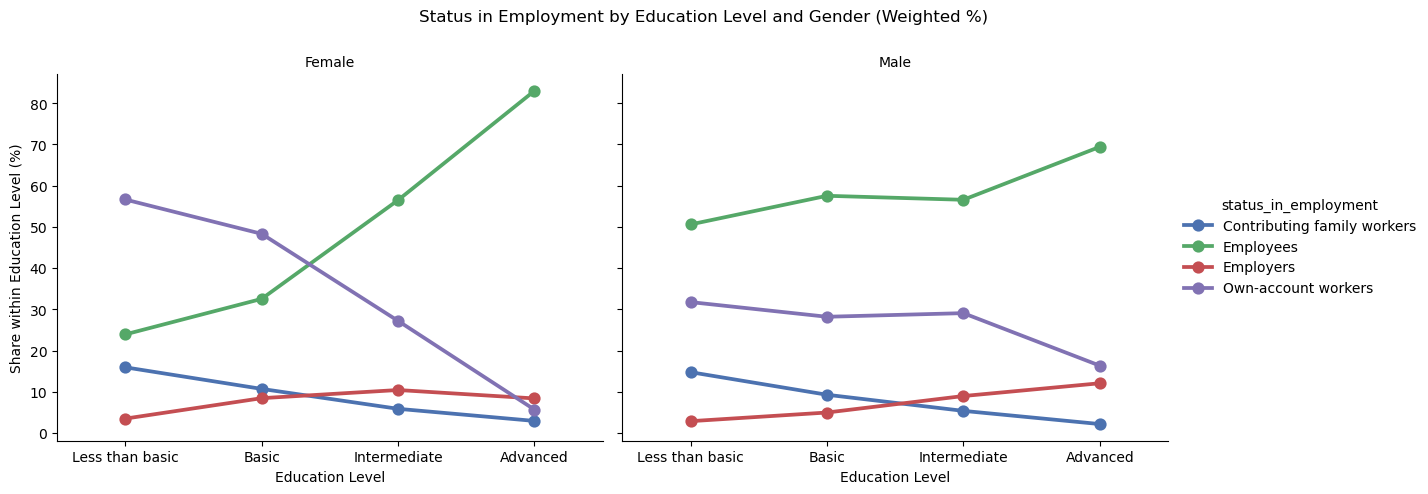

In [35]:
eg_employment = education_df.groupby(['gender', 'education_level', 'status_in_employment'], observed=True)['sample_weight'].sum().reset_index()
eg_employment['%'] = eg_employment.groupby(['gender', 'education_level'], observed=True)['sample_weight'].transform(lambda x: round((x/x.sum())*100, 2))

eg_pivot = eg_employment.pivot(index=['education_level', 'status_in_employment'], columns='gender', values='%')

g = sns.catplot(
    data=eg_employment,
    x='education_level',
    y='%',
    hue='status_in_employment',
    col='gender',
    kind='point',
    height=5,
    aspect=1.2,
    legend_out=True,
    markers='o',
    palette=vis_colors
)

g.set_axis_labels("Education Level", "Share within Education Level (%)")
g.set_titles("{col_name}")
g.figure.subplots_adjust(top=0.85)
g.figure.suptitle("Status in Employment by Education Level and Gender (Weighted %)")
plt.show()

**Figure 4.** Employment Status by Education Level & Gender (2019)

### __8.2 Key Findings__
- Females status in employment presents to be effected greater by education level when compared to men.

- As education levels increase, the number of female __"Own-account workers"__ decreases and __"Employees"__ increases
- Both genders react the same to increased education levels effects on __"Employers"__ and __"Contributing family workers"__ with
employers increasing with education levels and family workers decreasing.